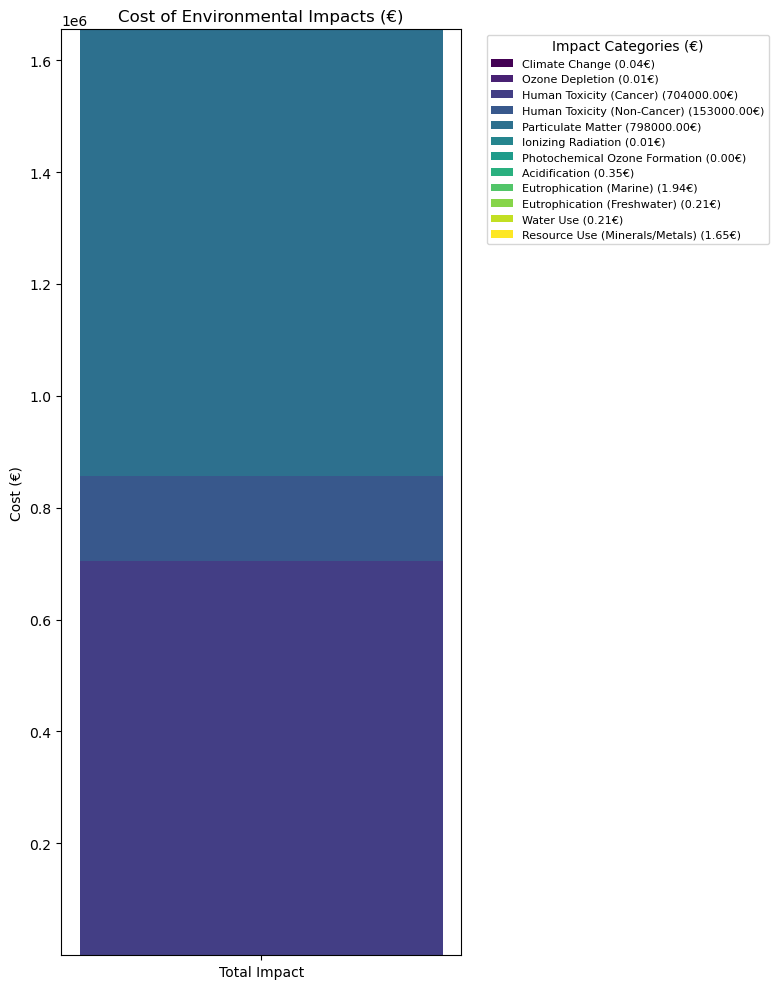

In [4]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Environmental Impact data with updated values
data = {
    "Environmental Impact": [
        "Climate Change", "Ozone Depletion", "Human Toxicity (Cancer)",
        "Human Toxicity (Non-Cancer)", "Particulate Matter", "Ionizing Radiation",
        "Photochemical Ozone Formation", "Acidification", "Eutrophication (Marine)",
        "Eutrophication (Freshwater)", "Water Use", "Resource Use (Minerals/Metals)"
    ],
    "Unit": [
        "kg CO2 eq", "kg CFC-11 eq", "CTUh", "CTUh", "Disease incidences",
        "kBg U235 eq", "kg NMVOC eq", "mol H+ eq", "kg N eq", "kg P eq", "m³", "kg Sb eq"
    ],
    "Minimum Value": [
        0.042, 0.008, 7.04E+05, 1.53E+05, 7.98E+05,
        1.22E-03, 2.30E-03, 3.50E-01, 1.94, 2.15E-01, 2.15E-01, 1.65E+00
    ],
    "Maximum Value": [
        0.685, 461, 9.19E+05, 1.66E+05, 7.98E+05,
        1.01E+00, 1.84E+01, 3.50E-01, 12.8, 1.96, 2.15E-01, 1.92E+04
    ],
    "Average Value": [
        0.3635, 230.504, 811500, 159500, 798000,
        0.50561, 9.20115, 0.35, 7.37, 1.0875, 0.215, 9600.825
    ]
}

dataframe = pd.DataFrame(data)

# GUI functions
def create_input_gui():
    global dataframe

    def save_data_and_next():
        try:
            # Collect input values
            values = []
            for i, impact in enumerate(dataframe["Environmental Impact"]):
                value = entries[i].get()
                if not value.strip():
                    messagebox.showerror("Error", f"Please fill in the value for {impact}.")
                    return
                values.append(float(value))

            # Save user input values to dataframe
            dataframe["Input Value"] = values
            input_window.destroy()
            create_cost_calculation_gui()
        except ValueError:
            messagebox.showerror("Error", "Please enter valid numeric values.")

    # Input GUI
    input_window = tk.Tk()
    input_window.title("Environmental Impact Input")
    input_window.geometry("600x800")

    tk.Label(input_window, text="Enter values for each Environmental Impact:", font=("Arial", 12)).pack(pady=10)

    frame = tk.Frame(input_window)
    frame.pack(pady=10)

    entries = []
    for i, impact in enumerate(dataframe["Environmental Impact"]):
        row = tk.Frame(frame)
        row.pack(fill="x", pady=2)

        tk.Label(row, text=impact, width=30, anchor="w").pack(side="left")
        entry = tk.Entry(row, width=10)
        entry.pack(side="left", padx=5)
        tk.Label(row, text=dataframe["Unit"][i], width=15, anchor="w").pack(side="left")
        entries.append(entry)

    tk.Button(input_window, text="Save Data", command=save_data_and_next).pack(pady=20)

    input_window.mainloop()

def create_cost_calculation_gui():
    global dataframe

    def calculate_and_display():
        try:
            # Get selected cost factor
            selection = selection_var.get()

            # Perform calculation
            dataframe["Cost Factor"] = dataframe[selection]
            dataframe["Cost (€)"] = dataframe["Input Value"] * dataframe["Cost Factor"]

            # Display results
            result_window = tk.Toplevel()
            result_window.title("Calculation Results")

            tree = ttk.Treeview(result_window, columns=["Environmental Impact", "Cost (€)"] , show="headings")
            tree.heading("Environmental Impact", text="Environmental Impact")
            tree.heading("Cost (€)", text="Cost (€)")
            tree.column("Environmental Impact", anchor=tk.CENTER)
            tree.column("Cost (€)", anchor=tk.CENTER)

            for _, row in dataframe.iterrows():
                tree.insert("", tk.END, values=[row["Environmental Impact"], row["Cost (€)"]])

            tree.pack(expand=True, fill=tk.BOTH)

            # Add a button to plot results
            tk.Button(result_window, text="Plot Results", command=plot_results).pack(pady=10)

        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {e}")

    def plot_results():
        try:
            # Prepare data for stacked bar chart
            categories = dataframe["Environmental Impact"]
            costs = dataframe["Cost (€)"]
            total_cost = costs.sum()

            fig, ax = plt.subplots(figsize=(8, 10))
            colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

            ax.bar(["Total Impact"], [total_cost], color="lightgray")

            # Add segments for each impact
            prev = 0
            for category, cost, color in zip(categories, costs, colors):
                ax.bar(["Total Impact"], [cost], bottom=prev, color=color, label=f"{category} ({cost:.2f}€)")
                prev += cost

            ax.set_title("Cost of Environmental Impacts (€)")
            ax.set_ylabel("Cost (€)")
            ax.legend(title="Impact Categories (€)", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

            plt.tight_layout()
            plt.show()
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred while plotting: {e}")

    # Cost Calculation GUI
    cost_window = tk.Tk()
    cost_window.title("Cost Calculation")
    cost_window.geometry("400x300")

    tk.Label(cost_window, text="Select Cost Factor (Minimum, Maximum, Average):", font=("Arial", 12)).pack(pady=10)

    selection_var = tk.StringVar(value="Minimum Value")
    selection_menu = ttk.Combobox(cost_window, textvariable=selection_var, state="readonly")
    selection_menu["values"] = ["Minimum Value", "Maximum Value", "Average Value"]
    selection_menu.pack(pady=10)

    tk.Button(cost_window, text="Calculate", command=calculate_and_display).pack(pady=20)

    cost_window.mainloop()

# Run the application
create_input_gui()

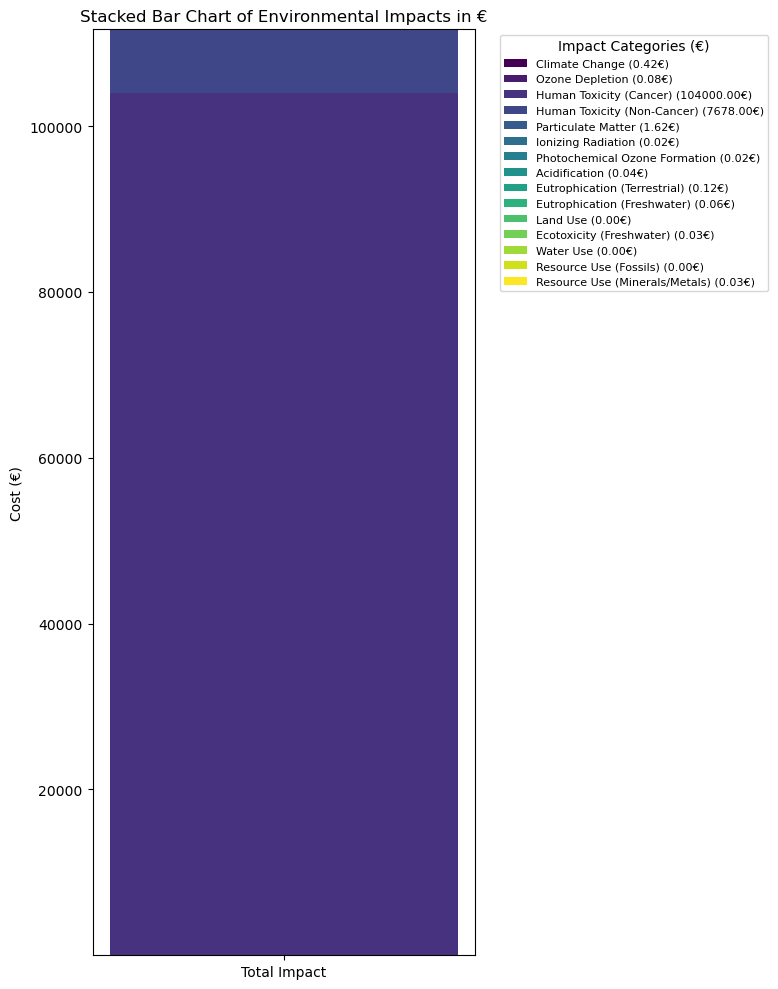

In [27]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Environmental Impact data
environmental_impacts = [
    "Climate Change", "Ozone Depletion", "Human Toxicity (Cancer)",
    "Human Toxicity (Non-Cancer)", "Particulate Matter", "Ionizing Radiation",
    "Photochemical Ozone Formation", "Acidification", "Eutrophication (Terrestrial)",
    "Eutrophication (Freshwater)", "Land Use", "Ecotoxicity (Freshwater)",
    "Water Use", "Resource Use (Fossils)", "Resource Use (Minerals/Metals)"
]

units = [
    "kg CO2 eq", "kg CFC-11 eq", "CTUh", "kg 1,4 DB eq", "kg PM2.5 eq",
    "kg U235 eq", "kg C2H4 eq", "kg SO2 eq", "kg PO4 eq", "kg P eq",
    "m2", "kg TEG eq", "m3", "MJ", "kg Fe eq"
]

# Predefined table with min/max/avg values
data = {
    "Environmental Impact": environmental_impacts,
    "Unit": units,
    "Minimum Value": [
        0.042, 0.008, 104000, 7678, 1.62, 0.023, 0.02, 0.04, 0.12, 0.06, 5.00E-05, 0.003, 1.00E-05, 0.00015, 0.003
    ],
    "Maximum Value": [
        3.26, 461, 920000, 295000, 55.5, 12.2, 2.95, 4.9, 3.87, 3.86, 1.25, 0.5, 0.057, 0.5, 0.57
    ],
    "Average Value": [
        1.651, 230.504, 512000, 151339, 28.56, 6.1115, 1.485, 2.47, 1.995, 1.96, 0.625025, 0.2515, 0.028505, 0.250075, 0.2865
    ]
}

dataframe = pd.DataFrame(data)

# GUI functions
def create_input_gui():
    def save_data_and_next():
        try:
            # Collect input values
            values = []
            for i, impact in enumerate(environmental_impacts):
                value = entries[i].get()
                if not value.strip():
                    messagebox.showerror("Error", f"Please fill in the value for {impact}.")
                    return
                values.append(float(value))

            # Save user input values to dataframe
            global dataframe
            dataframe["Input Value"] = values
            input_window.destroy()
            create_cost_calculation_gui()
        except ValueError:
            messagebox.showerror("Error", "Please enter valid numeric values.")

    # Input GUI
    input_window = tk.Tk()
    input_window.title("Environmental Impact Input")
    input_window.geometry("500x800")

    tk.Label(input_window, text="Enter values for each Environmental Impact:", font=("Arial", 12)).pack(pady=10)

    frame = tk.Frame(input_window)
    frame.pack(pady=10)

    entries = []
    for i, impact in enumerate(environmental_impacts):
        row = tk.Frame(frame)
        row.pack(fill="x", pady=2)

        tk.Label(row, text=impact, width=30, anchor="w").pack(side="left")
        entry = tk.Entry(row, width=10)
        entry.pack(side="left", padx=5)
        tk.Label(row, text=units[i], width=15, anchor="w").pack(side="left")
        entries.append(entry)

    tk.Button(input_window, text="Save Data", command=save_data_and_next).pack(pady=20)

    input_window.mainloop()

def create_cost_calculation_gui():
    def calculate_and_display():
        try:
            # Get selected cost factor
            selection = selection_var.get()

            # Perform calculation
            dataframe["Cost Factor"] = dataframe[selection]
            dataframe["Cost (€)"] = dataframe["Input Value"] * dataframe["Cost Factor"]

            # Display results
            result_window = tk.Toplevel()
            result_window.title("Calculation Results")

            tree = ttk.Treeview(result_window, columns=["Environmental Impact", "Cost (€)"] , show="headings")
            tree.heading("Environmental Impact", text="Environmental Impact")
            tree.heading("Cost (€)", text="Cost (€)")
            tree.column("Environmental Impact", anchor=tk.CENTER)
            tree.column("Cost (€)", anchor=tk.CENTER)

            for _, row in dataframe.iterrows():
                tree.insert("", tk.END, values=[row["Environmental Impact"], row["Cost (€)"]])

            tree.pack(expand=True, fill=tk.BOTH)

            # Add a button to plot results
            tk.Button(result_window, text="Plot Results", command=plot_results).pack(pady=10)

        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {e}")

    def plot_results():
        try:
            # Prepare data for stacked bar chart
            categories = dataframe["Environmental Impact"]
            costs = dataframe["Cost (€)"]
            total_cost = costs.sum()

            fig, ax = plt.subplots(figsize=(8, 10))
            colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

            ax.bar(["Total Impact"], [total_cost], color="lightgray")

            # Add segments for each impact
            prev = 0
            for category, cost, color in zip(categories, costs, colors):
                ax.bar(["Total Impact"], [cost], bottom=prev, color=color, label=f"{category} ({cost:.2f}€)")
                prev += cost

            ax.set_title("Stacked Bar Chart of Environmental Impacts in €")
            ax.set_ylabel("Cost (€)")
            ax.legend(title="Impact Categories (€)", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

            plt.tight_layout()
            plt.show()
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred while plotting: {e}")

    # Cost Calculation GUI
    cost_window = tk.Tk()
    cost_window.title("Cost Calculation")
    cost_window.geometry("400x300")

    tk.Label(cost_window, text="Select Cost Factor (Minimum, Maximum, Average):", font=("Arial", 12)).pack(pady=10)

    selection_var = tk.StringVar(value="Minimum Value")
    selection_menu = ttk.Combobox(cost_window, textvariable=selection_var, state="readonly")
    selection_menu["values"] = ["Minimum Value", "Maximum Value", "Average Value"]
    selection_menu.pack(pady=10)

    tk.Button(cost_window, text="Calculate", command=calculate_and_display).pack(pady=20)

    cost_window.mainloop()

# Run the application
create_input_gui()
